## İSMAİL GÜVEN 18050111016

In [182]:
from sklearn.datasets import load_iris
iris = load_iris()

In [183]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [184]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
import statistics

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [185]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [186]:
X = df.iloc[:, 0:4] # get all the rows and independent variables
y = df.iloc[:,-2] # get al the rows and target
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Every iterarion select best feature and get best accuracy

In [187]:
def getIndices(arr,indices):
    res = []
    for index in indices:
        res.append(arr[index])
    return res

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.feature_selection import SequentialFeatureSelector as SFS

def FFS(estimator):
    arr = [0,1,2,3]
    max_acc = -1;
    max_ind = -1;
    features = []
    for i in range(4):
        for j in range(len(arr)):
            features.append(arr[j])
            X = df.iloc[:, features] # get all the rows and independent variables
            y = df.iloc[:,-2] # get al the rows and target
            X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 123)
            estimator.fit(X_train,y_train)
            scores = cross_val_score(estimator, X_test, y_test, cv=5,scoring="accuracy")
            curr_acc = knnScore = statistics.mean(scores);
            print(getIndices(iris.feature_names,features),"acc is",curr_acc)
            if(curr_acc > max_acc):
                max_acc = curr_acc
                max_ind = arr[j]
            features.remove(arr[j])
                    
        if(features.count(max_ind) == 0): ## check is max_ind same with previous one      
            features.append(max_ind)
            arr.remove(max_ind)
        print("max_ind is ",getIndices(iris.feature_names,features),"acc is",max_acc)
    return [max_acc,getIndices(iris.feature_names,features)]

In [189]:
knn = KNeighborsClassifier(n_neighbors=1)

In [190]:
FFS(knn)

['sepal length (cm)'] acc is 0.7071428571428571
['sepal width (cm)'] acc is 0.7107142857142857
['petal length (cm)'] acc is 0.8392857142857143
['petal width (cm)'] acc is 0.9214285714285714
max_ind is  ['petal width (cm)'] acc is 0.9214285714285714
['petal width (cm)', 'sepal length (cm)'] acc is 0.8714285714285714
['petal width (cm)', 'sepal width (cm)'] acc is 0.9214285714285714
['petal width (cm)', 'petal length (cm)'] acc is 0.9464285714285714
max_ind is  ['petal width (cm)', 'petal length (cm)'] acc is 0.9464285714285714
['petal width (cm)', 'petal length (cm)', 'sepal length (cm)'] acc is 0.9214285714285714
['petal width (cm)', 'petal length (cm)', 'sepal width (cm)'] acc is 0.8964285714285715
max_ind is  ['petal width (cm)', 'petal length (cm)'] acc is 0.9464285714285714
['petal width (cm)', 'petal length (cm)', 'sepal length (cm)'] acc is 0.9214285714285714
['petal width (cm)', 'petal length (cm)', 'sepal width (cm)'] acc is 0.8964285714285715
max_ind is  ['petal width (cm)', '

[0.9464285714285714, ['petal width (cm)', 'petal length (cm)']]

## 3) Compute a matrix including combinations of two-features among all features

In [191]:
def get_accuracies(estimator):
    max_acc = -1;
    max_ind = -1;
    rows, cols = (4, 4)
    my_scores = []
    for i in range(4):
        for j in range(4):
            X = df.iloc[:, [i,j]] # get all the rows and independent variables
            y = df.iloc[:,-2] # get al the rows and target
            X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 123)
            estimator.fit(X_train,y_train)
            scores = cross_val_score(estimator, X_test, y_test, cv=5,scoring="accuracy")
            curr_acc = knnScore = statistics.mean(scores);
            my_scores.append(curr_acc)
    return my_scores

In [192]:
A = get_accuracies(knn)
A

[0.7071428571428571,
 0.8392857142857143,
 0.9,
 0.8714285714285714,
 0.8392857142857143,
 0.7107142857142857,
 0.9214285714285714,
 0.9214285714285714,
 0.9,
 0.9214285714285714,
 0.8392857142857143,
 0.9464285714285714,
 0.8714285714285714,
 0.9214285714285714,
 0.9464285714285714,
 0.9214285714285714]

In [193]:
B = np.reshape(A, (-1, 4))
print(B)

[[0.70714286 0.83928571 0.9        0.87142857]
 [0.83928571 0.71071429 0.92142857 0.92142857]
 [0.9        0.92142857 0.83928571 0.94642857]
 [0.87142857 0.92142857 0.94642857 0.92142857]]


<AxesSubplot:>

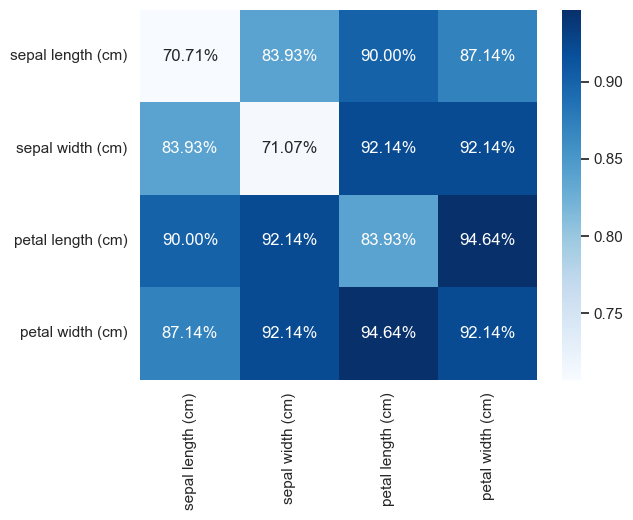

In [194]:
import seaborn as sns

# create seaborn heatmap with required labels
sns.heatmap(B, annot=True, cbar = True, xticklabels=iris.feature_names, yticklabels=iris.feature_names,fmt='.2%', cmap='Blues')

## 4) Compare brute-force vs forward feature selection in time and accuracy.

### In brute force approach we are tyring to get all possible combinations 
### In forward feature selection every iteration we select best feature and combinations until we have max number of feature that we had decided.

In [195]:
%%time
FFS(knn)

['sepal length (cm)'] acc is 0.7071428571428571
['sepal width (cm)'] acc is 0.7107142857142857
['petal length (cm)'] acc is 0.8392857142857143
['petal width (cm)'] acc is 0.9214285714285714
max_ind is  ['petal width (cm)'] acc is 0.9214285714285714
['petal width (cm)', 'sepal length (cm)'] acc is 0.8714285714285714
['petal width (cm)', 'sepal width (cm)'] acc is 0.9214285714285714
['petal width (cm)', 'petal length (cm)'] acc is 0.9464285714285714
max_ind is  ['petal width (cm)', 'petal length (cm)'] acc is 0.9464285714285714
['petal width (cm)', 'petal length (cm)', 'sepal length (cm)'] acc is 0.9214285714285714
['petal width (cm)', 'petal length (cm)', 'sepal width (cm)'] acc is 0.8964285714285715
max_ind is  ['petal width (cm)', 'petal length (cm)'] acc is 0.9464285714285714
['petal width (cm)', 'petal length (cm)', 'sepal length (cm)'] acc is 0.9214285714285714
['petal width (cm)', 'petal length (cm)', 'sepal width (cm)'] acc is 0.8964285714285715
max_ind is  ['petal width (cm)', '

[0.9464285714285714, ['petal width (cm)', 'petal length (cm)']]

In [196]:
import itertools

stuff = [0,1,2,3]
my_arr = []
for L in range(len(stuff) + 1):
    for subset in itertools.combinations(stuff, L):
        if(len(subset) != 0):
            my_arr.append(np.asarray(subset))
my_arr

[array([0]),
 array([1]),
 array([2]),
 array([3]),
 array([0, 1]),
 array([0, 2]),
 array([0, 3]),
 array([1, 2]),
 array([1, 3]),
 array([2, 3]),
 array([0, 1, 2]),
 array([0, 1, 3]),
 array([0, 2, 3]),
 array([1, 2, 3]),
 array([0, 1, 2, 3])]

In [197]:
def FFS_brute(estimator):
    my_X = []
    my_y = []
    max_acc = -1;
    max_ind = -1;
    features = []
    collections = []
    for features in my_arr:
        X = df.iloc[:, features] # get all the rows and independent variables
        y = df.iloc[:,-2] # get al the rows and target
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 123)
        estimator.fit(X_train,y_train)
        scores = cross_val_score(estimator, X_test, y_test, cv=5,scoring="accuracy")
        curr_acc = knnScore = statistics.mean(scores);
        my_X.append(curr_acc)
        string_of_features = ' '.join(getIndices(iris.feature_names,features))
        my_y.append(string_of_features)
        print(string_of_features,"acc is",curr_acc,)
    return [my_X,my_y]   

In [198]:
%%time
x_brute,y_brute = FFS_brute(knn)

sepal length (cm) acc is 0.7071428571428571
sepal width (cm) acc is 0.7107142857142857
petal length (cm) acc is 0.8392857142857143
petal width (cm) acc is 0.9214285714285714
sepal length (cm) sepal width (cm) acc is 0.8392857142857143
sepal length (cm) petal length (cm) acc is 0.9
sepal length (cm) petal width (cm) acc is 0.8714285714285714
sepal width (cm) petal length (cm) acc is 0.9214285714285714
sepal width (cm) petal width (cm) acc is 0.9214285714285714
petal length (cm) petal width (cm) acc is 0.9464285714285714
sepal length (cm) sepal width (cm) petal length (cm) acc is 0.9214285714285714
sepal length (cm) sepal width (cm) petal width (cm) acc is 0.9214285714285714
sepal length (cm) petal length (cm) petal width (cm) acc is 0.9214285714285714
sepal width (cm) petal length (cm) petal width (cm) acc is 0.8964285714285715
sepal length (cm) sepal width (cm) petal length (cm) petal width (cm) acc is 0.8964285714285715
CPU times: total: 266 ms
Wall time: 264 ms


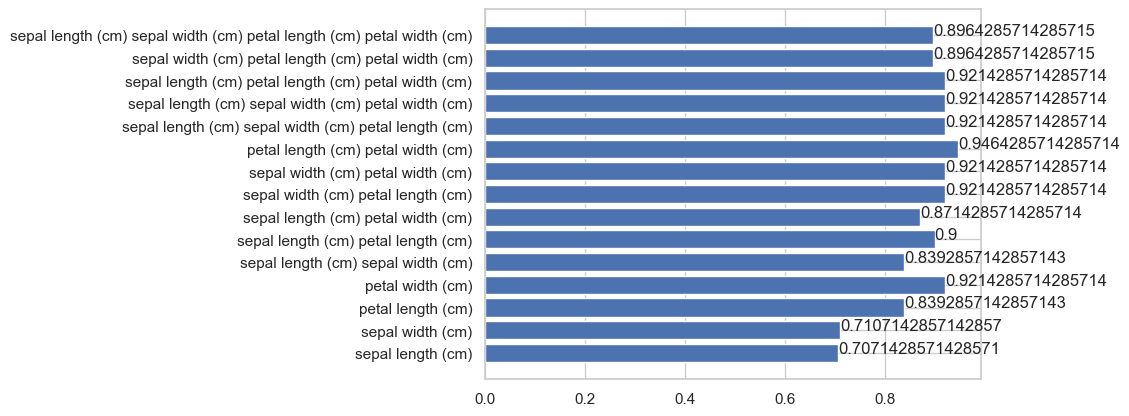

In [199]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import numpy as np

df = pd.DataFrame({'Features': y_brute,
                     'Accuracy':x_brute })

plt.barh(y_brute, x_brute)

for index, value in enumerate(x_brute):
    plt.text(value, index,
             str(value))
plt.show()

### In conclusion when we use brute force approach it takes more time and resource but we get all combinations of features therefore it is expensive than FFS, in forward selection we get best features for every iteration and if accuracy does not increase which means that there is no need to add new features thus we are trying to guarantee optimal model performance 